In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iit-admissions-dataset/student_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/kaggle/input/iit-admissions-dataset/student_data.csv' , index_col = 'Student Name')

In [4]:
df.head()

,Student ID,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
Student Name,,,,,,,,,
Bryan Rogers,165527,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
James Hogan,635763,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
David Robinson,740021,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
Susan Miller,433076,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
Brittany Martin,441628,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [5]:
df.shape

(200000, 9)

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, Bryan Rogers to Charles Marsh
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Date of Birth                200000 non-null  object
 2   Field of Study               200000 non-null  object
 3   Year of Admission            200000 non-null  int64 
 4   Expected Year of Graduation  200000 non-null  int64 
 5   Current Semester             200000 non-null  int64 
 6   Specialization               200000 non-null  object
 7   Fees                         200000 non-null  int64 
 8   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 15.3+ MB


In [7]:
df['Date of Birth']= pd.to_datetime(df['Date of Birth'])

In [8]:
df.head()

,Student ID,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
Student Name,,,,,,,,,
Bryan Rogers,165527,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
James Hogan,635763,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
David Robinson,740021,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
Susan Miller,433076,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
Brittany Martin,441628,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, Bryan Rogers to Charles Marsh
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Student ID                   200000 non-null  int64         
 1   Date of Birth                200000 non-null  datetime64[ns]
 2   Field of Study               200000 non-null  object        
 3   Year of Admission            200000 non-null  int64         
 4   Expected Year of Graduation  200000 non-null  int64         
 5   Current Semester             200000 non-null  int64         
 6   Specialization               200000 non-null  object        
 7   Fees                         200000 non-null  int64         
 8   Discount on Fees             200000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 15.3+ MB


In [10]:
df['year'] = pd.DatetimeIndex(df['Date of Birth']).year

In [11]:
df.head()

,Student ID,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,year
Student Name,,,,,,,,,,
Bryan Rogers,165527,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572,2006
James Hogan,635763,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,1999
David Robinson,740021,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871,1997
Susan Miller,433076,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284,1999
Brittany Martin,441628,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871,1998


In [12]:
df = df.drop('Date of Birth' , axis = 1)

In [13]:
df['Age'] = 2023 - df['year']

In [14]:
df.head()

,Student ID,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,year,Age
Student Name,,,,,,,,,,
Bryan Rogers,165527,Computer Science,2020,2017,3,Web Development,155152,19572,2006,17
James Hogan,635763,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,1999,24
David Robinson,740021,Civil Engineering,2017,2022,1,Network Security,55662,5871,1997,26
Susan Miller,433076,Computer Science,2021,2019,1,Data Science,134955,17284,1999,24
Brittany Martin,441628,Chemical Engineering,2016,2018,1,Network Security,125934,14871,1998,25


In [15]:
df = df.drop('year' , axis = 1)

In [16]:
df.head()

,Student ID,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Age
Student Name,,,,,,,,,
Bryan Rogers,165527,Computer Science,2020,2017,3,Web Development,155152,19572,17
James Hogan,635763,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,24
David Robinson,740021,Civil Engineering,2017,2022,1,Network Security,55662,5871,26
Susan Miller,433076,Computer Science,2021,2019,1,Data Science,134955,17284,24
Brittany Martin,441628,Chemical Engineering,2016,2018,1,Network Security,125934,14871,25


In [17]:
df['Specialization'].unique()

array(['Web Development', 'Machine Learning', 'Network Security',
       'Data Science', 'Artificial Intelligence'], dtype=object)

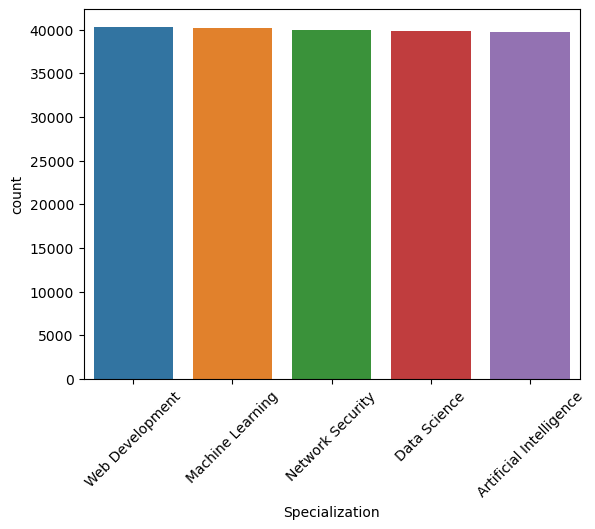

In [18]:
sns.countplot(data = df , x = 'Specialization')
plt.xticks(rotation = 45);

In [19]:
df['Current Semester'].unique()

array([3, 2, 1, 4])

<Axes: xlabel='Current Semester', ylabel='count'>

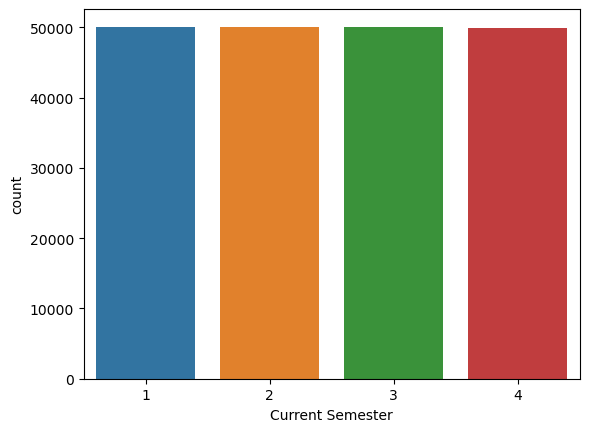

In [20]:
sns.countplot(df ,x = 'Current Semester')

In [21]:
df.head()

,Student ID,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Age
Student Name,,,,,,,,,
Bryan Rogers,165527,Computer Science,2020,2017,3,Web Development,155152,19572,17
James Hogan,635763,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,24
David Robinson,740021,Civil Engineering,2017,2022,1,Network Security,55662,5871,26
Susan Miller,433076,Computer Science,2021,2019,1,Data Science,134955,17284,24
Brittany Martin,441628,Chemical Engineering,2016,2018,1,Network Security,125934,14871,25


In [22]:
top_fees_payer= pd.DataFrame(df[['Fees','Field of Study' , 'Current Semester']].sort_values( ascending = False , by = 'Fees'))[0:10]

In [23]:
top_fees_payer

,Fees,Field of Study,Current Semester
Student Name,,,
Jonathan Simmons,200000,Electrical Engineering,3
Terry Mcneil,199999,Civil Engineering,3
Erica Anderson,199999,Chemical Engineering,3
Anthony Anderson,199999,Chemical Engineering,4
Julie Jones,199998,Civil Engineering,2
Jennifer Wright,199998,Electrical Engineering,4
Beth Thompson,199996,Electrical Engineering,4
Tanya Glass,199996,Civil Engineering,1
Alice Reed,199996,Mechanical Engineering,1


# **top 10 fees payer from computer science background**

In [24]:
comp_dataset = df[df['Field of Study']  ==  'Computer Science']

In [25]:
com_highest_payer = pd.DataFrame(comp_dataset['Fees'].sort_values(ascending = False))[0:10]

In [26]:
com_highest_payer

,Fees
Student Name,
Anthony Cruz,199994
Manuel Jackson,199992
Dawn Morris,199986
Wendy Martin,199985
Anthony Neal,199984
Thomas Ruiz,199983
Joseph Walker,199978
Jeffrey Thomas,199976
Rebecca Gonzalez,199972


In [27]:
df['Field of Study'].unique()

array(['Computer Science', 'Mechanical Engineering', 'Civil Engineering',
       'Chemical Engineering', 'Electrical Engineering'], dtype=object)

# **top 10 peyer from mechanical engineering background**

In [28]:
mech_dataset = df[df['Field of Study']  ==  'Mechanical Engineering']

In [29]:
mech_highest_payer = pd.DataFrame(mech_dataset['Fees'].sort_values(ascending = False))[0:10]

In [30]:
mech_highest_payer

,Fees
Student Name,
Alice Reed,199996
Catherine Pineda,199992
Michael Thompson,199987
Ruth Davis,199984
Stephen Hardin,199984
Tamara Hall,199982
Robert Diaz,199981
Olivia Jackson,199978
Lisa Baker,199975


# **top 10 payer from civil engineering background**

In [31]:
civil_dataset = df[df['Field of Study'] == 'Civil Engineering']

In [32]:
civil_heighst_pay = pd.DataFrame(civil_dataset['Fees'].sort_values(ascending = False))[0:10]

In [33]:
civil_heighst_pay

,Fees
Student Name,
Terry Mcneil,199999
Julie Jones,199998
Tanya Glass,199996
Scott Allen,199993
Sierra Green,199991
Jeffery Brewer,199990
David Porter,199983
Michael Dickson,199979
Adrian Rose,199978


# **top 10 payer from chemical engineering background**

In [34]:
chemical_dataset = df[df['Field of Study'] == 'Chemical Engineering']

In [35]:
chem_heighst_pay = pd.DataFrame(chemical_dataset['Fees'].sort_values(ascending = False))[0:10]

In [36]:
chem_heighst_pay

,Fees
Student Name,
Erica Anderson,199999
Anthony Anderson,199999
Kelli Melendez,199991
Sara Watts,199985
Ryan Roberts,199983
Tammy Marks,199972
Warren Crawford,199972
Heather Griffin,199970
Mikayla Johnson,199967


# **top 10 heighest payer from electrical engineering background**

In [37]:
elc_dataset = df[df['Field of Study'] == 'Electrical Engineering']

In [38]:
elc_heighst_pay = pd.DataFrame(elc_dataset['Fees'].sort_values(ascending = False))[0:10]

In [39]:
elc_heighst_pay

,Fees
Student Name,
Jonathan Simmons,200000
Jennifer Wright,199998
Beth Thompson,199996
Cheryl Bailey,199991
Thomas Townsend,199988
Joseph Zamora,199982
Ashley Jackson,199975
Anna Allen,199963
Tammy Cole,199962


In [40]:
df.head()

,Student ID,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Age
Student Name,,,,,,,,,
Bryan Rogers,165527,Computer Science,2020,2017,3,Web Development,155152,19572,17
James Hogan,635763,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,24
David Robinson,740021,Civil Engineering,2017,2022,1,Network Security,55662,5871,26
Susan Miller,433076,Computer Science,2021,2019,1,Data Science,134955,17284,24
Brittany Martin,441628,Chemical Engineering,2016,2018,1,Network Security,125934,14871,25


In [41]:
df['Year of Admission'].unique()

array([2020, 2017, 2021, 2016, 2019, 2022, 2018])

<Axes: xlabel='Year of Admission', ylabel='count'>

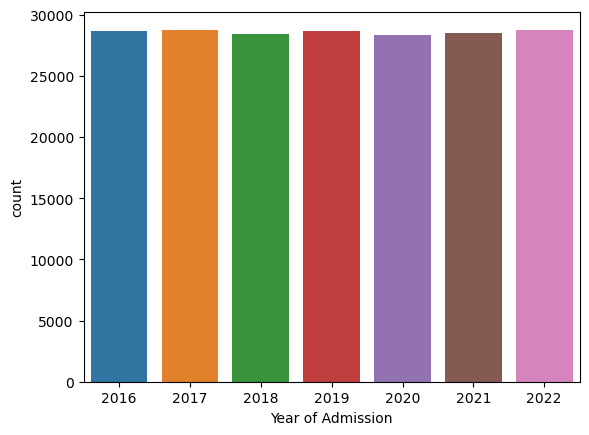

In [42]:
sns.countplot(df , x = 'Year of Admission')

In [43]:
spec_dataset = pd.DataFrame(df['Specialization'].value_counts())

In [44]:
spec_dataset

,Specialization
Web Development,40292
Machine Learning,40142
Network Security,39932
Data Science,39870
Artificial Intelligence,39764


# **web devolopment and machine learning is the top selected course taken by students in iit**

# **top 10 student who has got the heighst discount on fees**

In [45]:
dis_dataset = pd.DataFrame(df[['Discount on Fees' , 'Field of Study' , 'Current Semester']].sort_values(ascending = False , by = 'Discount on Fees')[0:10])

In [46]:
dis_dataset

,Discount on Fees,Field of Study,Current Semester
Student Name,,,
Jeffrey Walker,39865,Computer Science,4
Patricia Vasquez,39746,Mechanical Engineering,1
Jeremy Neal,39736,Computer Science,4
Jason Townsend,39722,Civil Engineering,1
Kimberly Griffin,39715,Chemical Engineering,1
Matthew Lewis,39715,Civil Engineering,2
Timothy Rivera,39702,Computer Science,1
James Foster,39662,Civil Engineering,4
Daniel Curtis,39659,Electrical Engineering,4


In [47]:
df.head()

,Student ID,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Age
Student Name,,,,,,,,,
Bryan Rogers,165527,Computer Science,2020,2017,3,Web Development,155152,19572,17
James Hogan,635763,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760,24
David Robinson,740021,Civil Engineering,2017,2022,1,Network Security,55662,5871,26
Susan Miller,433076,Computer Science,2021,2019,1,Data Science,134955,17284,24
Brittany Martin,441628,Chemical Engineering,2016,2018,1,Network Security,125934,14871,25


In [48]:
df['Age'].unique()

array([17, 24, 26, 25, 20, 19, 22, 21, 23, 18])

<Axes: xlabel='Age', ylabel='count'>

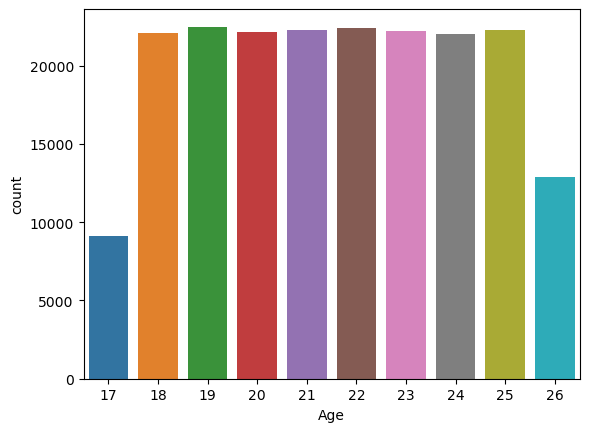

In [49]:
sns.countplot(df , x = 'Age')

# **sem wise avg age of student** 

In [50]:
df.groupby('Current Semester')['Age'].mean()

Current Semester
1    21.567992
2    21.585536
3    21.578127
4    21.599547
Name: Age, dtype: float64

****it is more or less same avg age was showing****